## Questions
- Is using only chi squared tests a blunder
- Degrees of freedom for chi squared (using dof = 8 renders questionable results)(could it be empty values?)
- Degress of freedom equals nan for degrees of freedom = 8
- Which chisq function do you use
- Should i regularize counts for chi squared test (make them smaller because significance goes down with sample size)
- When regularizing should i round to integers
- Removal of NA's
- Only remove row-wise for direct comparison between two movies
- How to use charts to support
- When to start capstone

# Project 1

In [1]:
import math
import scipy
import scipy.stats
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
df = pd.read_csv('movieReplicationSet.csv')

In [3]:
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
demographic_columns = list(df.columns[-77:]) # column names with demographic info
movie_columns = list(df.columns[:400]) # column names containing movies

alpha = 0.005 # define alpha level to compare to later
inverse_scaling = [1,10,100,500]

In [5]:
'''UNUSED'''

def test_two_movies_for_differences(df1, df2, alpha=0.005, d_f=8):
    
    # chi sq testing
    df1_value_counts = pd.Series(df1).value_counts()
    df2_value_counts = pd.Series(df2).value_counts()

    # normalizing counts
    if(np.sum(df1_value_counts.values)>np.sum(df2_value_counts.values)):
        num_df1_ratings = np.sum(df1_value_counts.values)
        num_df2_ratings = np.sum(df2_value_counts.values)
        df1_value_counts = df1_value_counts*(num_df2_ratings/num_df1_ratings)

    else:
        num_df2_ratings = np.sum(df2_value_counts.values)
        num_df1_ratings = np.sum(df1_value_counts.values)
        df2_value_counts = df2_value_counts*(num_df1_ratings/num_df2_ratings)


    # fill in missing rating level with 0
    for rating in np.linspace(0,4,9):
        if rating not in df1_value_counts.index:
            df1_value_counts[rating] = 0
        if rating not in df2_value_counts.index:
            df2_value_counts[rating] = 0
    
    df1_value_counts = df1_value_counts.sort_index(ascending = True)
    df2_value_counts = df2_value_counts.sort_index(ascending = True)
    print(df1_value_counts)
    print(df2_value_counts)
    
    results = scipy.stats.chisquare(df1_value_counts.values, 
                          f_exp=df2_value_counts.values, 
                          axis=0)
    print(results.pvalue)
    return results.pvalue

In [6]:
# function used
def test_all_movies_for_differences(df1, df2, alpha=0.005, d_f=8):
    difference = 0

    # for movie in available movies 
    for movie in df1.columns:
        # reduce to selected movie
        df1_reviews = df1[movie]
        df2_reviews = df2[movie]

        
        # generate value counts of different ratings
        df1_value_counts = df1_reviews.value_counts()
        df2_value_counts = df2_reviews.value_counts()
    
        # fill in missing rating level with 0
        for rating in np.linspace(0,4,9):
            if rating not in df1_value_counts.index:
                df1_value_counts[rating] = 1
            if rating not in df2_value_counts.index:
                df2_value_counts[rating] = 1
      
        # normalizing counts
        if(np.sum(df1_value_counts.values)>np.sum(df2_value_counts.values)):
            num_df1_ratings = np.sum(df1_value_counts.values)
            num_df2_ratings = np.sum(df2_value_counts.values)
            df1_value_counts = df1_value_counts*(num_df2_ratings/num_df1_ratings)
            
        else:
            num_df2_ratings = np.sum(df2_value_counts.values)
            num_df1_ratings = np.sum(df1_value_counts.values)
            df2_value_counts = df2_value_counts*(num_df1_ratings/num_df2_ratings)
            
        df1_value_counts = df1_value_counts.sort_index(ascending = True)
        df2_value_counts = df2_value_counts.sort_index(ascending = True)
        
        print(movie)
        
        # perform chi squared test
        results = scipy.stats.chisquare(df1_value_counts.values, 
                  f_exp=df2_value_counts.values, 
                  axis=0) # p value is extremely small 
        print(results.pvalue)
        # compare resulting pvalue to our alpha threshold
        if results.pvalue>alpha:
            continue
        else:
            difference+=1

    ratio_with_difference = difference/len(df1.columns)
    print("Ratio of movies for which we reject the null hypothesis")
    return ratio_with_difference

In [7]:
def aggregate_histogram_all_movies(df1, df2):
    series1 = df1[movie_columns[0]].dropna().value_counts().sort_index(ascending=True)
    series2 = df2[movie_columns[0]].dropna().value_counts().sort_index(ascending=True)
    print(series1)
    
    for movie in movie_columns[1:]:
        for stars in df1[movie].dropna().value_counts().index:
            
            if stars not in series1.index:
                series1[stars] = 0
            series1[stars] += df1[movie].dropna().value_counts()[stars]
            
        for stars in df2[movie].dropna().value_counts().index:    
            if stars not in series2.index:
                series2[stars] = 0
            series2[stars] += df2[movie].dropna().value_counts()[stars]
    print(series1)
    series1.plot(kind='bar')
    plt.xlabel('Rating')
    plt.ylabel('Rating Count')
    plt.show()
    series2.plot(kind='bar')
    plt.xlabel('Rating')
    plt.ylabel('Rating Count')
    plt.show()
    return

### 1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [8]:
# select only columns with movies, find average rating and median of averages
df_movies = df[movie_columns]
aggregate_num_ratings = np.array([df_movies[movie].value_counts().sum() for movie in df_movies.columns])
median_num_ratings = np.median(aggregate_num_ratings)

In [9]:
np.mean(aggregate_num_ratings)

280.535

In [10]:
# generating names of popular and unpopular movies for selection from original df
pop_movies = [[movie,num_ratings][0] for num_ratings, movie in zip(aggregate_num_ratings,movie_columns)
               if num_ratings>=median_num_ratings]

unpop_movies = [[movie,num_ratings][0] for num_ratings, movie in zip(aggregate_num_ratings,movie_columns)
               if num_ratings<median_num_ratings]


# confirm we split down the middle
print("Popular and unpopular movie counts")
print(len(pop_movies))
print(len(unpop_movies))

unpop_movies_df = df[unpop_movies]
pop_movies_df = df[pop_movies]

unpop_counts_list = [unpop_movies_df[column].value_counts() for column in unpop_movies_df.columns] 
pop_counts_list = [pop_movies_df[column].value_counts() for column in pop_movies_df.columns]

# adding all indices to new counts to prevent nans
for value_count in unpop_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0
            
# adding all indices to new counts to prevent nans
for value_count in pop_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0
            
# aggregating data
unpop_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
pop_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])

for movie_value_counts in unpop_counts_list:
    unpop_movies_aggregate += movie_value_counts
    
for movie_value_counts in pop_counts_list:
    pop_movies_aggregate += movie_value_counts
    
unpop_movies_aggregate = unpop_movies_aggregate*(pop_movies_aggregate.sum()/unpop_movies_aggregate.sum())

Popular and unpopular movie counts
200
200


In [11]:
unpop_movies_aggregate.sum()

90214.0

In [12]:
pop_movies_aggregate.sum()

90214.0

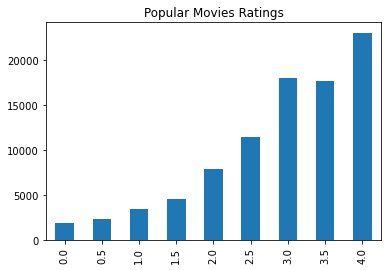

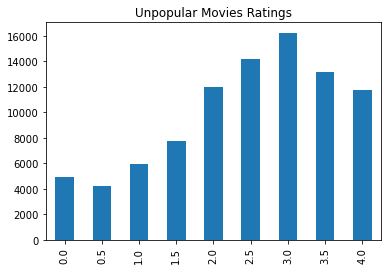

In [13]:
# hists to get a gist of what's going on here
plt.title("Popular Movies Ratings")
pop_movies_aggregate.plot(kind='bar')
plt.show()

plt.title("Unpopular Movies Ratings")
unpop_movies_aggregate.plot(kind='bar')
plt.show()

In [14]:

for scaling in inverse_scaling:
    results = scipy.stats.chisquare(pop_movies_aggregate.values/scaling, 
                          f_exp=unpop_movies_aggregate.values/scaling,  
                          axis=0) # p value is extremely small 
    print(f"s = {scaling}, p-value = {results.pvalue}")



s = 1, p-value = 0.0
s = 10, p-value = 0.0
s = 100, p-value = 4.4577659283194885e-38
s = 500, p-value = 4.5146967778132454e-06


### 2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]


# SOLVED

In [15]:
movie_years = [int(movie[-5:-1]) for movie in movie_columns]
median_year = np.median(movie_years)

old_movies = [movie for movie in movie_columns if int(movie[-5:-1]) < median_year]
new_movies = [movie for movie in movie_columns if int(movie[-5:-1]) >= median_year]

old_movies_df = df[old_movies]
new_movies_df = df[new_movies]

old_counts_list = [old_movies_df[column].value_counts() for column in old_movies_df.columns] 
new_counts_list = [new_movies_df[column].value_counts() for column in new_movies_df.columns]

# adding all indices to new counts to prevent nans
for value_count in new_counts_list:
    for rating in np.linspace(0,4,9):
        if rating not in value_count.index:
            value_count[rating]=0

# aggregating data
old_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
new_movies_aggregate = pd.Series(data=np.zeros(9),index=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])

for movie_value_counts in old_counts_list:
    old_movies_aggregate += movie_value_counts
    
for movie_value_counts in new_counts_list:
    new_movies_aggregate += movie_value_counts
    
old_movies_aggregate = old_movies_aggregate*(new_movies_aggregate.sum()/old_movies_aggregate.sum())

old_movies_aggregate = old_movies_aggregate.sort_index()
new_movies_aggregate = new_movies_aggregate.sort_index()

for scaling in inverse_scaling:
    results = scipy.stats.chisquare(old_movies_aggregate.values/scaling, 
                          f_exp=new_movies_aggregate.values/scaling,
                          axis=0) # p value is extremely small 
    print(f"s = {scaling}, p-value = {results.pvalue}")

s = 1, p-value = 3.628347485931739e-15
s = 10, p-value = 0.38078547759329434
s = 100, p-value = 0.9990048292364794
s = 500, p-value = 0.9999979110335391


In [16]:
new_movies_aggregate.sum()

65690.0

In [17]:
old_movies_aggregate.sum()

65690.0

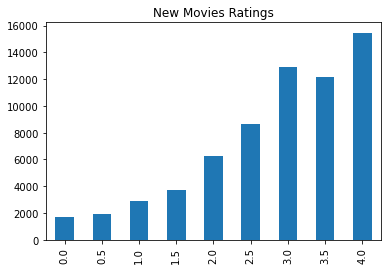

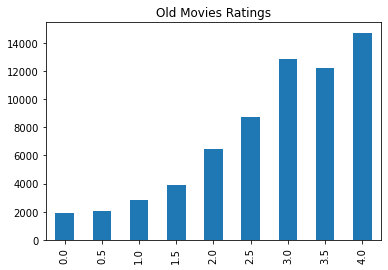

In [18]:
# hists to get a gist of what's going on here
plt.title("New Movies Ratings")
new_movies_aggregate.plot(kind='bar')
plt.show()

plt.title("Old Movies Ratings")
old_movies_aggregate.plot(kind='bar')
plt.show()

## The normal chi squared says that they are different, but when we make the samples smaller, they are very closely related

### 3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?


In [19]:
print([movie for movie in df.columns if "Shrek" in movie])

['Shrek 2 (2004)', 'Shrek (2001)']


In [20]:
df_shrek = df[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]

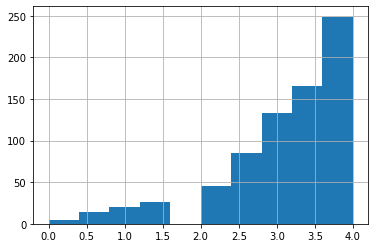

In [21]:
df_women = df_shrek[df_shrek['Gender identity (1 = female; 2 = male; 3 = self-described)']==1]
df_women['Shrek (2001)'].hist()
plt.show()

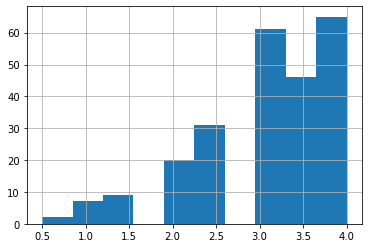

In [22]:
df_men = df_shrek[df_shrek['Gender identity (1 = female; 2 = male; 3 = self-described)']==2]
df_men['Shrek (2001)'].hist()
plt.show()

In [23]:
value_counts_men = df_men['Shrek (2001)'].value_counts()
value_counts_women = df_women['Shrek (2001)'].value_counts()
value_counts_men[0.0] = 0

value_counts_men = value_counts_men.sort_index(ascending=True)
value_counts_women = value_counts_women.sort_index(ascending=True)

value_counts_men = value_counts_men*(np.sum(value_counts_women)/np.sum(value_counts_men))

<AxesSubplot:>

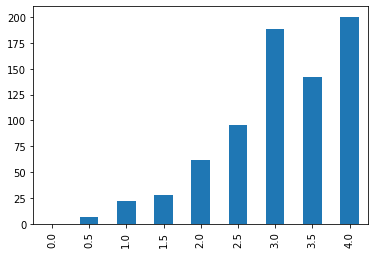

In [24]:
value_counts_men.plot(kind='bar')

<AxesSubplot:>

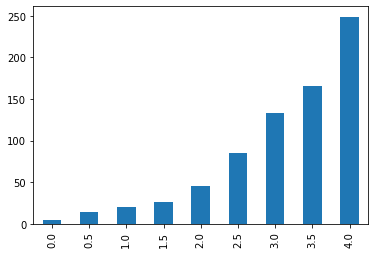

In [25]:
value_counts_women.plot(kind='bar')

In [26]:
df_men['Shrek (2001)'].mean()

3.08298755186722

In [27]:
df_women['Shrek (2001)'].mean()

3.155450874831763

In [28]:
# normalize the value counts so chisq operation works
results = scipy.stats.chisquare(value_counts_men.values, 
                      f_exp=value_counts_women.values, 
                      axis=0) # p value is extremely small 

# reject the 

In [29]:
print(results.pvalue)
print(results.pvalue<alpha)

1.1197812970884265e-08
True


In [30]:
test_two_movies_for_differences(df_women['Shrek (2001)'],df_men['Shrek (2001)'], d_f=7)

0.0     1.621803
0.5     4.541050
1.0     6.487214
1.5     8.433378
2.0    14.596231
2.5    27.570659
3.0    43.139973
3.5    53.843876
4.0    80.765814
Name: Shrek (2001), dtype: float64
0.0     0
0.5     2
1.0     7
1.5     9
2.0    20
2.5    31
3.0    61
3.5    46
4.0    65
Name: Shrek (2001), dtype: int64
0.0


C:\Users\Jack\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


0.0

An extremely low P-value less than our alpha threshold means that we fail to reject the null hypothesis that gender has no impact on Shrek ratings

### 4) What proportion of movies are rated differently by male and female viewers?


In [31]:
# seperate by gender
men_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)']==2]
women_df = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)']==1]

# reduce to only movie columns
men_df = men_df[movie_columns]
women_df = women_df[movie_columns]

### Figure out whether scaling value counts is legal / determining dof

In [32]:
difference = 0

for movie in men_df.columns:
    male_reviews = men_df[movie]
    female_reviews = women_df[movie]
    male_value_counts = male_reviews.value_counts()
    female_value_counts = female_reviews.value_counts()
    
    for rating in np.linspace(0,4,9):
        if rating not in male_value_counts.index:
            male_value_counts[rating] = 0
        if rating not in female_value_counts.index:
            female_value_counts[rating] = 0
    
    # normalizing counts
    num_male_ratings = np.sum(male_value_counts.values)
    num_female_ratings = np.sum(female_value_counts.values)
    male_value_counts = male_value_counts*round(num_female_ratings/num_male_ratings)
    
    results = scipy.stats.chisquare(male_value_counts.values, 
              f_exp=female_value_counts.values, 
              axis=0) # p value is extremely small 

    if results.pvalue>alpha:
        continue
    else:
        difference+=1
        
print(difference/len(men_df.columns))

C:\Users\Jack\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp
C:\Users\Jack\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


0.4375


In [33]:
test_all_movies_for_differences(men_df,women_df)

The Life of David Gale (2003)
0.03914185046273349
Wing Commander (1999)
0.0006541612928162531
Django Unchained (2012)
5.387209511451958e-06
Alien (1979)
7.729632141761491e-06
Indiana Jones and the Last Crusade (1989)
0.07117148964336714
Snatch (2000)
0.035785763420451124
Rambo: First Blood Part II (1985)
0.0006123802045460986
Fargo (1996)
0.00642804404436284
Let the Right One In (2008)
0.22689127624278435
Black Swan (2010)
0.36092180563940546
King Kong (1976)
0.6458556726875373
The Machinist (2004)
0.012353529586095353
A Nightmare on Elm Street (1984)
0.1238552824069338
Brazil (1985)
0.00016782170905434548
The Fast and the Furious (2001)
0.10048668669189688
Change of Habit (1969)
0.2006222685754686
American Beauty (1999)
0.17991197779731846
Psycho (1960)
0.6787136480976345
Terminator 3: Rise of the Machines (2003)
0.12175571743279813
Night of the Living Dead (1968)
0.006990525552376883
Man on Fire (2004)
0.0013148349229791258
Star Wars: Episode IV - A New Hope (1977)
0.0182078160990139

What Lies Beneath (2000)
2.135049404335671e-05
Toy Story (1995)
0.00733451522975958
Boy's Don't Cry (1999)
8.11839331055492e-07
Pearl Harbor (2001)
0.08065744984097861
A.I. Artificial Intelligence (2001)
9.694953500173864e-06
The Sting (1973)
8.98396589462539e-05
Scream 3 (2000)
0.20917558479645046
Congo (1995)
0.29185588745766156
Bowling For Columbine (2002)
3.5397669831422477e-09
What Women Want (2000)
0.0022982634608605043
Home Alone (1990)
0.03605909575903291
How the Grinch Stole Christmas (2000)
0.038578237688778556
The Straight Story (1999)
2.5028522579089305e-09
The Hulk (2003)
0.6977474539698176
Gigli (2002)
0.21120802805220262
Rocky V (1991)
0.40592560896978164
The Visit (2015)
0.6400155439484063
Titanic (1997)
0.005067889266828648
A Clockwork Orange (1971)
0.035080694389624044
Charlie's Angels (2000)
3.340068557164731e-06
Friday the 13th Part III (1982)
0.3571451634069295
Hannibal (2001)
0.012239908165944644
Pulp Fiction (1994)
0.01309085796456233
Crimson Tide (1995)
0.019143

0.3825

### 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [34]:
only_child_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==1]
siblings_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==0]

only_child_df = only_child_df["The Lion King (1994)"]
siblings_df = siblings_df["The Lion King (1994)"]

only_child_values = only_child_df.value_counts()
siblings_values = siblings_df.value_counts()

for rating in np.linspace(0,4,9):
    if rating not in only_child_values.index:
        only_child_values[rating] = 0
    if rating not in siblings_values.index:
        siblings_values[rating] = 0
        
# normalizing counts
num_only_child_ratings = np.sum(only_child_values.values)
num_siblings_ratings = np.sum(siblings_values.values)
only_child_values = only_child_values*round(num_siblings_ratings/num_only_child_ratings)

results = scipy.stats.chisquare(only_child_values.values, 
          f_exp=siblings_values.values, 
          axis=0) # p value is extremely small 

In [35]:
results.pvalue

0.0004600079254529032

In [36]:
only_child_df.mean()

3.347682119205298

In [37]:
siblings_df.mean()

3.481958762886598

### 6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [38]:
difference = 0

only_child_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==1]
siblings_df = df[df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]==0]
only_child_df = only_child_df[movie_columns]
siblings_df = siblings_df[movie_columns]

# only 
for movie in only_child_df.columns:
    only_child_reviews = only_child_df[movie]
    siblings_reviews = siblings_df[movie]
    only_child_value_counts = only_child_reviews.value_counts()
    siblings_value_counts = siblings_reviews.value_counts()
    
    for rating in np.linspace(0,4,9):
        if rating not in only_child_value_counts.index:
            only_child_value_counts[rating] = 0
        if rating not in siblings_value_counts.index:
            siblings_value_counts[rating] = 0
    
    # normalizing counts
    num_only_child_ratings = np.sum(only_child_value_counts.values)
    num_siblings_ratings = np.sum(siblings_value_counts.values)
    only_child_value_counts = only_child_value_counts*round(num_siblings_ratings/num_only_child_ratings)
    
    results = scipy.stats.chisquare(only_child_value_counts.values, 
              f_exp=siblings_value_counts.values, 
              ddof=8, 
              axis=0) # p value is extremely small 

    if results.pvalue>alpha:
        continue
    else:
        difference+=1
        
print(difference/len(only_child_df.columns))

C:\Users\Jack\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp
C:\Users\Jack\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


1.0


In [39]:
test_all_movies_for_differences(only_child_df, siblings_df)

The Life of David Gale (2003)
0.7304076817119642
Wing Commander (1999)
0.9518687493214589
Django Unchained (2012)
2.2361452640663058e-05
Alien (1979)
0.06524474727008955
Indiana Jones and the Last Crusade (1989)
0.6473520267099353
Snatch (2000)
0.21849629310273053
Rambo: First Blood Part II (1985)
0.21389624995530415
Fargo (1996)
0.746232448419207
Let the Right One In (2008)
0.06791137814192423
Black Swan (2010)
0.36441328943359125
King Kong (1976)
0.5224755369921372
The Machinist (2004)
8.633930172094841e-23
A Nightmare on Elm Street (1984)
0.5016491938385711
Brazil (1985)
0.07309020147058909
The Fast and the Furious (2001)
0.13176948276189915
Change of Habit (1969)
0.4292255470028462
American Beauty (1999)
0.2862700799975716
Psycho (1960)
0.09981605273742025
Terminator 3: Rise of the Machines (2003)
0.12425914274012285
Night of the Living Dead (1968)
0.5295623966709381
Man on Fire (2004)
0.01599160156949278
Star Wars: Episode IV - A New Hope (1977)
0.1806185218274715
The Silence of t

Best Laid Plans (1999)
0.3448444020917366
Bram Stoker's Dracula (1992)
0.46964563227494327
Fahrenheit 9/11 (2004)
0.006684706419279443
Donnie Darko (2001)
0.0805516603018428
Bad Teacher (2011)
0.17927296214712732
Cable Guy (1996)
0.36023884406478507
Ice Age (2002)
0.48970847798284967
Misery (1990)
0.7883573263995407
8 Mile (2002)
0.1693523245721911
Harry Potter and the Deathly Hallows: Part 2 (2011)
0.8439203390943725
Ouija: Origin of Evil (2016)
0.5931789750551577
The Deer Hunter (1978)
0.7166184621099101
There's Something About Mary (1998)
0.045053270914159615
Zoolander (2001)
0.818209762868759
The Core (2003)
0.47372843111119933
Spirited Away (2001)
0.056574957336557354
Rocky (1976)
0.03626593821049813
Traffic (2000)
0.2413684282765449
Monsters  Inc.(2001)
0.32293580471152766
Thoroughly Modern Millie (1967)
0.9163884330121992
Requiem for a Dream (2000)
0.14532776610118336
Downfall (2004)
0.2871486146897303
L.A. Confidential (1997)
0.2890174820912793
Chicago (2002)
0.4437980248102204

0.12

0.0    1
0.5    2
1.0    1
1.5    2
2.0    1
2.5    4
3.0    4
3.5    2
Name: The Life of David Gale (2003), dtype: int64
0.0     945
0.5     698
1.0     817
1.5    1174
2.0    2008
2.5    2658
3.0    3393
3.5    3099
4.0    4150
Name: The Life of David Gale (2003), dtype: int64


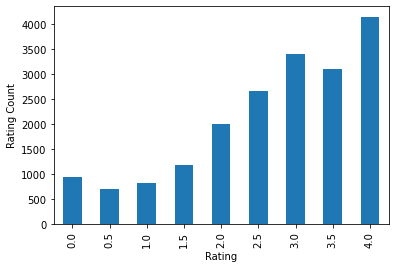

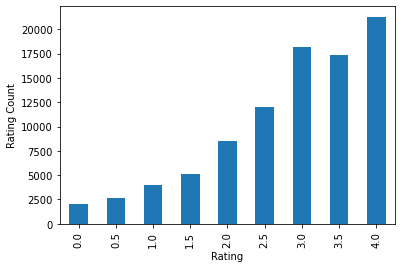

In [40]:
aggregate_histogram_all_movies(only_child_df, siblings_df)

### 7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [41]:
solo_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
solo_df = solo_df['The Wolf of Wall Street (2013)']
group_df = group_df['The Wolf of Wall Street (2013)']
solo_df.dropna(inplace=True)
group_df.dropna(inplace=True)
solo_values = solo_df.value_counts()
group_values = group_df.value_counts()

<ipython-input-41-6c1bb1897a66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_df.dropna(inplace=True)
<ipython-input-41-6c1bb1897a66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df.dropna(inplace=True)


In [42]:
for rating in np.linspace(0,4,9):
    if rating not in solo_values.index:
        solo_values[rating] = 0
    if rating not in group_values.index:
        group_values[rating] = 0
        
# normalizing counts
num_solo_ratings = np.sum(solo_values.values)
num_group_ratings = np.sum(group_values.values)
solo_values = solo_values*(num_group_ratings/num_solo_ratings)

results = scipy.stats.chisquare(only_child_values.values, 
          f_exp=siblings_values.values, 
          axis=0) # p value is extremely small 

In [43]:
num_group_ratings

270

In [44]:
results.pvalue

0.0004600079254529032

In [45]:
print(solo_df.mean())
print(group_df.mean())

3.143765903307888
3.033333333333333


### 8) What proportion of movies exhibit such a “social watching” effect?

In [46]:
solo_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group_df = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
solo_df = solo_df[movie_columns]
group_df = group_df[movie_columns]

In [47]:
solo_df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
7,3.5,NaN,3.5,2.5,3.0,3.0,3.0,3.5,4.0,4.0,...,2.0,3.5,4.0,3.5,4.0,NaN,3.5,4.0,4.0,3.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,4.0,4.0,3.0,3.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1091,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [48]:
test_all_movies_for_differences(solo_df, group_df)

The Life of David Gale (2003)
2.2374975196078102e-05
Wing Commander (1999)
0.00029589880344119157
Django Unchained (2012)
0.008394444712204439
Alien (1979)
0.003538541978645832
Indiana Jones and the Last Crusade (1989)
0.006005009033749331
Snatch (2000)
0.010064087276370183
Rambo: First Blood Part II (1985)
0.028258887872988487
Fargo (1996)
0.01795574240693889
Let the Right One In (2008)
7.958532878810109e-05
Black Swan (2010)
0.17986302149005057
King Kong (1976)
0.00015696944312124683
The Machinist (2004)
0.19110308211816
A Nightmare on Elm Street (1984)
0.0877428188520818
Brazil (1985)
0.02981466623441426
The Fast and the Furious (2001)
0.014079286152874959
Change of Habit (1969)
0.19240000648742128
American Beauty (1999)
8.691258828538809e-05
Psycho (1960)
0.03549920790259359
Terminator 3: Rise of the Machines (2003)
0.011492560450654925
Night of the Living Dead (1968)
0.0016295394312894765
Man on Fire (2004)
0.004207202629206431
Star Wars: Episode IV - A New Hope (1977)
0.129143805

American Pie (1999)
0.7834636492075392
Daredevil (2003)
0.02940239544797892
The Bandit (1996)
0.010478929487614584
Grease (1978)
0.15026280048956067
The Girl Next Door (2004)
0.08687937341150666
The Godfather (1972)
0.7757948326213883
Cloverfield (2008)
0.03898241828980499
Rush Hour 2 (2001)
0.0035818616041771736
Bruce Almighty (2003)
0.001636920470453704
Girl With a Pearl Earring (2003)
0.012756274351459478
Grown Ups 2 (2013)
0.09597200918585472
Best Laid Plans (1999)
0.009338095649152143
Bram Stoker's Dracula (1992)
0.006905545152534726
Fahrenheit 9/11 (2004)
0.28551502193275097
Donnie Darko (2001)
1.0092039729711244e-06
Bad Teacher (2011)
0.0057806700999850705
Cable Guy (1996)
0.7314292884729301
Ice Age (2002)
0.28022939630334553
Misery (1990)
0.724628270369857
8 Mile (2002)
0.011249987947533593
Harry Potter and the Deathly Hallows: Part 2 (2011)
0.0002564347251430264
Ouija: Origin of Evil (2016)
0.1294928803406705
The Deer Hunter (1978)
0.250272922903461
There's Something About Mar

0.25

0.0    3
0.5    5
1.0    4
1.5    6
2.0    5
2.5    1
3.0    5
3.5    3
4.0    5
Name: The Life of David Gale (2003), dtype: int64
0.0     1618
0.5     2065
1.0     2569
1.5     3498
2.0     6131
2.5     8457
3.0    12181
3.5    11441
4.0    14454
Name: The Life of David Gale (2003), dtype: int64


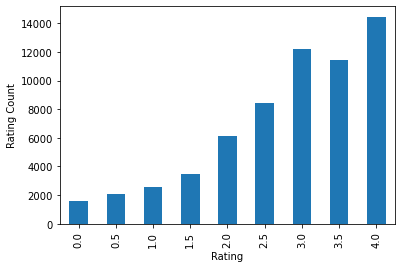

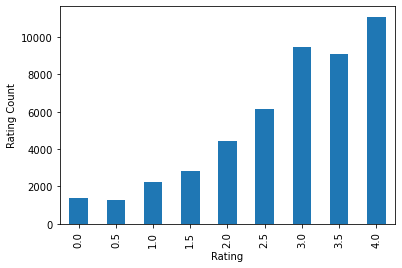

In [49]:
aggregate_histogram_all_movies(solo_df, group_df)

### 9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’? 

In [50]:
df_both = df[['Home Alone (1990)', 'Finding Nemo (2003)']]

In [51]:
finding_nemo_values = df_both['Finding Nemo (2003)'].value_counts().sort_index(ascending=True)
home_alone_values = df_both['Home Alone (1990)'].value_counts().sort_index(ascending=True)
home_alone_values = home_alone_values*(np.sum(finding_nemo_values)/np.sum(home_alone_values))


In [52]:
finding_nemo_values.sum()

1014

In [53]:
home_alone_values.sum()

1014.0

In [54]:
# normalize the value counts so chisq operation works
results = scipy.stats.chisquare(home_alone_values/10, 
                      f_exp=finding_nemo_values/10, 
                      axis=0) # p value is extremely small 


In [55]:
results.pvalue

0.12620594050184222

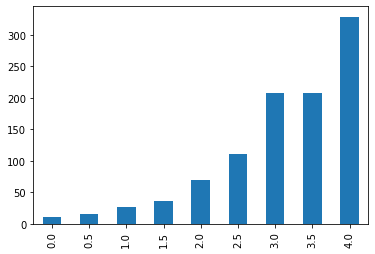

<AxesSubplot:>

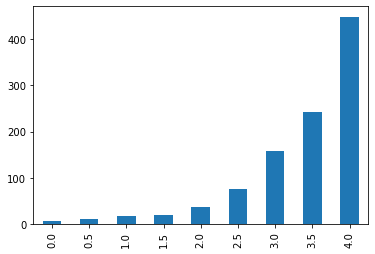

In [56]:
home_alone_values.plot(kind='bar')
plt.show()
finding_nemo_values.plot(kind='bar')

### 10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [57]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 
              'Pirates of the Caribbean', 'Toy Story', 'Batman']
df_dict = {}

null_combos = []
null_pvalues = []

diff_combos = []
diff_pvalues = []

for franchise in franchises:
    df_dict[franchise] = df[[column for column in movie_columns if franchise in column]].dropna()

In [58]:
for franchise in franchises:
    franchise_df = df_dict[franchise]
    movie_combos = list(combinations(franchise_df.columns,2))
    for combo in movie_combos:
        df1 = franchise_df[combo[0]]
        df2 = franchise_df[combo[1]]
        print(combo)
        df1_values = df1.value_counts().sort_index(ascending=True).values
        df2_values = df2.value_counts().sort_index(ascending=True).values
        # normalize the value counts so chisq operation works
        results = scipy.stats.chisquare(df1_values, 
                      f_exp=df2_values, 
                      ddof=7, 
                      axis=0) # p value is extremely small 
        print(results.pvalue)
        if results.pvalue>alpha:
            null_combos.append(combo)
            null_pvalues.append(results.pvalue)
        else:
            diff_combos.append(combo)
            diff_pvalues.append(results.pvalue)
            

('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode II - Attack of the Clones (2002)')
1.3907337126654917e-47
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode V - The Empire Strikes Back (1980)')
0.4526323363382463
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode 1 - The Phantom Menace (1999)')
5.94325008927071e-42
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VII - The Force Awakens (2015)')
0.006281235139714168
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VI - The Return of the Jedi (1983)')
0.013985271777484338
('Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode V - The Empire Strikes Back (1980)')
3.7017185236884806e-47
('Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode 1 - The Phantom Menace (1999)')
1.3977039888825396e-09
('Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode VII - The Force Awakens (2015)')
8.3474782418579

In [59]:
for franchise in franchises:
    franchise_df = df_dict[franchise]
    groups = []
    for movie in franchise_df.columns:
        groups.append(franchise_df[movie].values)
        
    results = scipy.stats.kruskal(*groups)
    print(franchise)
    print(results.pvalue)

Star Wars
6.940162236984522e-40
Harry Potter
0.11790622831256074
The Matrix
1.7537323830838066e-09
Indiana Jones
1.020118354785894e-11
Jurassic Park
1.8492328391686058e-11
Pirates of the Caribbean
0.035792727694248905
Toy Story
7.902234665149812e-06
Batman
4.1380499020034183e-19


In [60]:
print("Fail to reject null hypothesis")
for combo, pvalue in zip(null_combos, null_pvalues):
    print(combo)
    print(pvalue)
    
    
print()
print()
print("Reject the null hypothesis")
for combo, pvalue in zip(diff_combos, diff_pvalues):
    print(combo)
    print(pvalue)

Fail to reject null hypothesis
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode V - The Empire Strikes Back (1980)')
0.4526323363382463
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VII - The Force Awakens (2015)')
0.006281235139714168
('Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VI - The Return of the Jedi (1983)')
0.013985271777484338
('Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode VII - The Force Awakens (2015)')
0.015392912524666388
('Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode VI - The Return of the Jedi (1983)')
0.008419155348938024
('Star Wars: Episode VII - The Force Awakens (2015)', 'Star Wars: Episode VI - The Return of the Jedi (1983)')
0.010174045541437332
('Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Harry Potter and the Goblet of Fire (2005)')
0.016626620339751874
('Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Harry Potter and the Ch

### Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

I believe the additional pairwise anlaysis of movies within each franchise sufficiently completes this criteria.

## Completed
- ALL (let's go)